In [273]:
import numpy as np
import math
import matplotlib.pyplot as plt
from functools import partial
from matplotlib.animation import FuncAnimation

# 投影和重建
## 投影
### 三维坐标
设在三维空间有一个向量，(x,y,z),然后这个空间有3个正交基(1,0,0),(0,1,0),(0,0,1)，那么我们将这个向量通过点乘的方法投影到这3个正交基上，可以分别得到3个系数，x，y，z
然后分别将这3个系数乘以三个基并且累加就可以还原这个向量的位置 = x*(1,0,0)+y*(0,1,0)+z*(0,0,1) = (x,y,z)

### Vector Space
设有一个连续的函数F(x)



<img src="Images/func1.png" >

我们可以在一定区间内对其采样，得到N个sample，[x1,x2,x3,x4.....xn]，这样一个数组也可以将其看作一个N维的向量

<img src="Images/samplefunc.png" >

设有一组基函数e(x)，他们只在采样点返回1，其余点返回0

<img src="Images/basis.png" >

对他们进行采样也能等到一组N维向量，基于定义我们得到的向量如下：

e0=[1,0,0,0,0,0,0...]

e1=[0,1,0,0,0,0,0...]

e2=[0,0,1,0,0,0,0...]

...

显然，他们两两正交

将刚才对原函数的采样得到的N维向量一次和这些基向量点乘，我们就完成了将原函数投影到一组正交基的过程

<img src="Images/projection.png" >

显然，如果我们过把N个sample逐个乘以基函数，然后将他们累加起来，就可以重建原函数

<img src="Images/rebuilt2.png" >

<img src="Images/rebuilt.png" >

对于空间中任意一点，他所受到的光照可以表示为一个球面函数，Irrdiance map，类似于一维函数的傅里叶变换，我们可以把这个球面函数投影到若干个球谐基函数，得到其在这个基函数上的系数，并且在渲染时通过系数重建该函数
首先定义一个函数MyFunc，他模拟了两个互相垂直的方向光的Irrdiance

2.0
0.6680013346680014
0.40160400400159674
0.28743657941116996


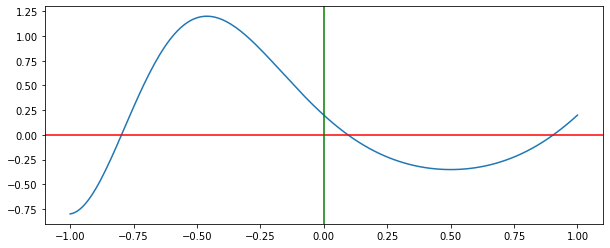

In [287]:



facttable = [math.factorial(x) for x in range(0, 100)]
# for fast factorial calculation


def factorial(x):
    return facttable[x]

#  evaluate an Associated Legendre Polynomial P(l,m,x) at x 
def P(l, m, x):    
    pmm = 1.0
    somx2 = math.sqrt((1.0 - x) * (1.0 + x))
    fact = 1.0

    for i in range(1, m+1):  # (int i=1; i <= m; i++):
        pmm *= (-fact) * somx2
        fact += 2.0

    if (l == m):
        return pmm

    pmmp1 = x * (2.0 * m + 1.0) * pmm
    if (l == m + 1):
        return pmmp1

    pll = 0.0
    for ll in range(m+2, l+1):  # (int ll=m + 2; ll <= l; ++ll):

        pll = ((2.0 * ll - 1.0) * x * pmmp1 - (ll + m - 1.0) * pmm) / (ll - m)
        pmm = pmmp1
        pmmp1 = pll

    return pll

def SampleFunc(func, samplePoints):
    return [func(x) for x in samplePoints]


def FuncInnerProduct(func1, func2, lowBound, hiBound, resolution):
    samplePoints = np.linspace(lowBound, hiBound,resolution)
    v1 = SampleFunc(func1, samplePoints)
    v2 = SampleFunc(func2, samplePoints)
    product = np.array(v1)*np.array(v2)
    return np.sum(product)/resolution*(hiBound-lowBound)

ee = partial(P, 0,0)
print(FuncInnerProduct(ee,ee,-1,1,1000))
ee = partial(P, 1,0)
print(FuncInnerProduct(ee,ee,-1,1,1000))
ee = partial(P, 2,0)
print(FuncInnerProduct(ee,ee,-1,1,1000))
ee = partial(P, 3,0)
print(FuncInnerProduct(ee,ee,-1,1,1000))
def MyFunc(x):
    return math.sin((x-1)*(0.777*x)*3)+0.2




lowResSamples = np.linspace(-1,1,20)
hiResSamples = np.linspace(-1,1,200)


func1LowResSamples = SampleFunc(MyFunc, lowResSamples)
func1HiResSamples = SampleFunc(MyFunc, hiResSamples)

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10, 4))
axes.plot(hiResSamples, SampleFunc(MyFunc, hiResSamples))
axes.axhline(0, color='red')
axes.axvline(0, color='green')

# scatterX=[]
# scatterY=[]
# segs=[]
# sc = axes.scatter(scatterX, scatterY)

# vl = axes.vlines([],[],[])


# def AnimationFunction(frame):
#     x = lowResSamples[frame]
#     y = func1LowResSamples[frame]
#     scatterX.append(x)
#     scatterY.append(y)
#     segs.append(  ((x,0),(x,y))    )
#     sc.set_offsets(np.c_[scatterX,scatterY])
#     vl.set_segments(segs)

# anim_created = FuncAnimation(fig, AnimationFunction, frames=M, interval=2000)
# anim_created.save("Images/sampleFunc.gif")




In [275]:

#定义一个基函数，他只在采样点附近为1，其余时候返回0
def funcBasis(resolution, threshold,band,x):
    m = np.linspace(-1,1,resolution)[band]
    if abs(x- m)<threshold:
        return 1*resolution*0.5
    return 0

funcBasis1 = partial(funcBasis,10,0.02)

def funcBasisP(idx,x):
    return P(idx,0,x)


# fig,axes = plt.subplots(nrows=10, ncols=1)
# fig.set_size_inches((10,20))

# samplePoints = np.linspace(-1,1,50)
# for i,ax in enumerate(axes):
#     ax.axhline(0, color='black')
#     e = partial(funcBasis1,i)
#     ax.plot(samplePoints,SampleFunc(e,samplePoints))
#     ax.set_title("e{0}".format(i))

# fig.savefig("Images/basis")

In [276]:

def Project(originFunction, basisFunctions, resolution, lowBound=-1, hiBound = 1):

    coeffs = []  # result

    samplePoints = np.linspace(-1, 1, resolution)

    originFuncSample = SampleFunc(originFunction, samplePoints)
    basisSamples = []
    products = []

    for i, b in enumerate(basisFunctions):
        bSamples = SampleFunc(b, samplePoints)
        basisSamples.append(bSamples)
        prod = np.array(originFuncSample) * np.array(basisSamples[i]) # only inner product
        products.append(prod)
        coeffs.append(np.sum(prod)*((hiBound-lowBound)/resolution)) #integral
    return coeffs, samplePoints, originFuncSample, basisSamples, products


In [277]:


def PlotProductsAnimation(samplePoints, originFuncSample, basisSamples, products, coeffs, figSize=(10, 10)):
    count = len(basisSamples)
    fig, axes = plt.subplots(nrows=count, ncols=3)
    fig.set_size_inches(figSize)

    it = iter(enumerate(axes))
    for i, row in it:
        ax = row[0]
        ax.axhline(0, color='black')

        ax.plot(samplePoints, basisSamples[i])
        ax.set_title("e{0}".format(i))

        ax.text(1.02, 0.5, 'Dot',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)
        ax = row[1]
        ax.axhline(0, color='black')
        ax.plot(samplePoints, originFuncSample)
        ax.text(1.02, 0.5, ' = ',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

        ax = row[2]
        ax.axhline(0, color='black')

        ax.plot(samplePoints, products[i])

        ax.text(1.02, 0.5, ' = {:.3f}'.format(coeffs[i]),
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax.transAxes)

    fig.savefig("Images/projection")


# coeffs, samplePoints, originFuncSample, basisSamples, products = Project(func1, [partial(testingBasisFunc,i) for i in range(50)])
# PlotProducts( samplePoints, originFuncSample, basisSamples, products, coeffs, figSize=(20,50))

# plt.plot(samplePoints, products[0])


In [278]:
# rebuild
def Rebuild(coeffs,basisFuncs, resolution, normalizeTerm):
    ret = np.zeros(resolution)
    samplePoints=np.linspace(-1,1,resolution)
    for i,coeff in enumerate(coeffs):
        samples = np.array(SampleFunc(basisFuncs[i],samplePoints))
        ret += samples * coeff *normalizeTerm[i]
    return ret


# y = rebuild(coeffs,  [partial(testingBasisFunc,i) for i in range(50)],50)




[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


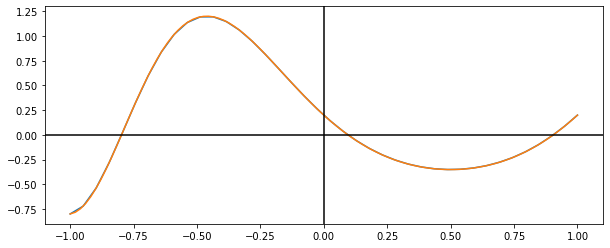

In [297]:
resolution = 40
funcBasis1 = partial(funcBasis,resolution,0.01)
basisCount = 40
basisFunctions = [partial(funcBasis1,i) for i in range(basisCount)]
renormalizeTerms = [ 1/FuncInnerProduct(basisFunctions[x], basisFunctions[x],-1,1,resolution) for x in range(basisCount)]
print(renormalizeTerms)
coeffs, samplePoints, originFuncSample, basisSamples, products = Project(MyFunc, basisFunctions,resolution=resolution)

# PlotProductsAnimation( samplePoints, originFuncSample, basisSamples, products, coeffs, figSize=(20,20))

y = Rebuild(coeffs,  basisFunctions,resolution,normalizeTerm=renormalizeTerms)

# print(y)
fig,axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches((10,4))
samplePoints=np.linspace(-1,1,resolution)
plt.plot(samplePoints,y)
plt.plot(np.linspace(-1,1,100), SampleFunc(MyFunc,np.linspace(-1,1,100)))

plt.axhline(0, color='black')
plt.axvline(0, color='black')
fig.savefig("Images/rebuilt")

In [280]:

# fig,axes = plt.subplots(nrows=1, ncols=1)
# fig.set_size_inches((10,4))
# samplePoints=np.linspace(-1,1,50)
# plt.plot(samplePoints,y)
# plt.axhline(0, color='black')
# fig.savefig("Images/rebuilt")



# fig,axes = plt.subplots(nrows=10, ncols=2)
# fig.set_size_inches((10,20))
# i = 0
# fig.tight_layout(pad=5.0)

# def partialSampleRetuilt( sampledRebuilt , n):
#     ret = []
#     for i in range(M):
#         if ( i <= n):
#             ret.append(sampledRebuilt[i])
#         else:
#             ret.append(0)
#     return ret
    


# for row in axes:
#     ax = row[0]
#     ax.axhline(0, color='black')
#     e = partial(funcBasis,(i+0.5)/M)
#     ax.plot(samples,SampleFunc(e,samples))
#     ax.set_title("e{0}".format(i))
    
#     ax.text(1.02, 0.5, ' * {:.3f} = '.format(coeffs[i]),
#             horizontalalignment='left',
#             verticalalignment='top',
#             transform=ax.transAxes)
#     ax = row[1]
#     ax.axhline(0, color='black')
#     ax.plot(samples,partialSampleRetuilt(y,i))
#     ax.text(1.02, 0.5, ' + ',
#                 horizontalalignment='left',
#                 verticalalignment='top',
#                 transform=ax.transAxes)

#     i+=1
# fig.savefig("Images/rebuilt2")